In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from datetime import datetime as dt
from sklearn.preprocessing import PolynomialFeatures as pf
import seaborn as sns

In [2]:
co19=pd.read_csv('covid_19_india.csv')
co19.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [3]:
co19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
co19

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [5]:
co19.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [6]:

co19['Date']=pd.to_datetime(co19['Date'])
co19['Date']=co19['Date'].map(dt.toordinal)
df=co19.groupby(co19['Date']).sum()
y=df['Deaths'].values
x=co19['Date'].unique()
x,y

(array([737454, 737455, 737456, 737457, 737458, 737459, 737460, 737461,
        737462, 737463, 737464, 737465, 737466, 737467, 737468, 737469,
        737470, 737471, 737472, 737473, 737474, 737475, 737476, 737477,
        737478, 737479, 737480, 737481, 737482, 737483, 737484, 737485,
        737486, 737487, 737488, 737489, 737490, 737491, 737492, 737493,
        737494, 737495, 737496, 737497, 737498, 737499, 737500, 737501,
        737502, 737503, 737504, 737505, 737506, 737507, 737508, 737509,
        737510, 737511, 737512, 737513, 737514, 737515, 737516, 737517,
        737518, 737519, 737520, 737521, 737522, 737523, 737524, 737525,
        737526, 737527, 737528, 737529, 737530, 737531, 737532, 737533,
        737534, 737535, 737536, 737537, 737538, 737539, 737540, 737541,
        737542, 737543, 737544, 737545, 737546, 737547, 737548, 737549,
        737550, 737551, 737552, 737553, 737554, 737555, 737556, 737557,
        737558, 737559, 737560, 737561, 737562, 737563, 737564, 

In [7]:
linear=lr()
linear.fit(x.reshape(-1,1),y)

LinearRegression()

In [8]:
linear.coef_

array([732.95007732])

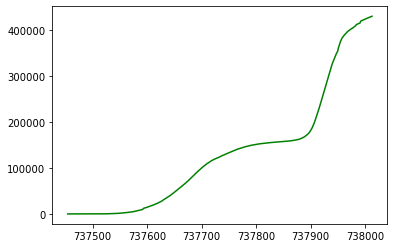

In [9]:
plt.plot(x,y,c='g')

<AxesSubplot:>

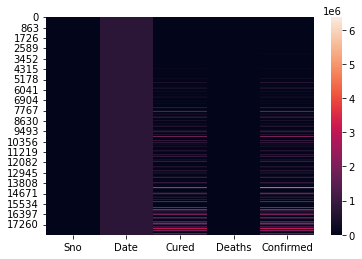

In [10]:
coint=co19.select_dtypes('int64')
sns.heatmap(coint)

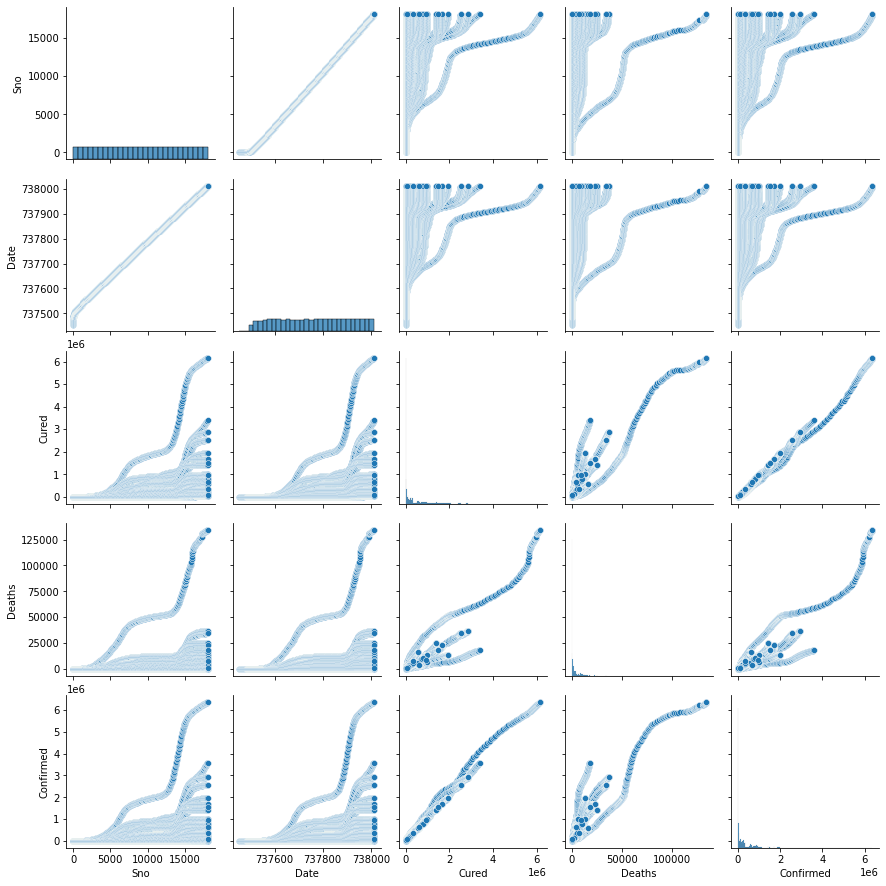

In [11]:
sns.pairplot(co19)

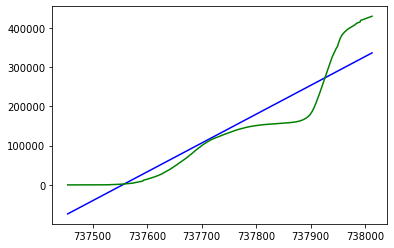

In [12]:
pred=linear.predict(x.reshape(-1,1))
plt.plot(x,pred,c='b')
plt.plot(x,y,c='g')

In [13]:
from sklearn.metrics import r2_score as AS
score1=AS(y,pred)
score1

0.863219131284597

C:\Users\numam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

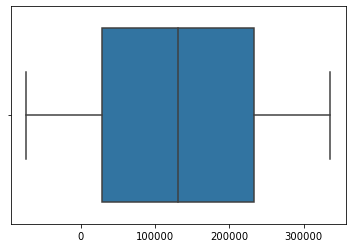

In [14]:
sns.boxplot(pred)

In [15]:
co19

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,737454,6:00 PM,Kerala,1,0,0,0,1
1,2,737455,6:00 PM,Kerala,1,0,0,0,1
2,3,737456,6:00 PM,Kerala,2,0,0,0,2
3,4,737457,6:00 PM,Kerala,3,0,0,0,3
4,5,737458,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,738013,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,738013,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,738013,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,738013,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [16]:
co19['Deaths'].groupby(co19["State/UnionTerritory"]).sum()

State/UnionTerritory
Andaman and Nicobar Islands                    27136
Andhra Pradesh                               2939367
Arunachal Pradesh                              26799
Assam                                         638323
Bihar                                        1093466
Bihar****                                      18881
Cases being reassigned to states                   0
Chandigarh                                    147694
Chhattisgarh                                 2063920
Dadra and Nagar Haveli                             8
Dadra and Nagar Haveli and Daman and Diu        1014
Daman & Diu                                        0
Delhi                                        4943294
Goa                                           447801
Gujarat                                      2219448
Haryana                                      1502799
Himachal Pradesh                              491348
Himanchal Pradesh                               3507
Jammu and Kashmir        

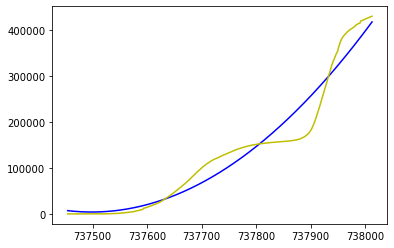

In [17]:
poly=pf(degree=2)
pol=poly.fit_transform(x.reshape(-1,1),y)
linear.fit(pol,y)
pred=linear.predict(pol)
plt.plot(x,pred,c="b")
plt.plot(x,y,c="y")

In [18]:
from sklearn.metrics import r2_score as AS

In [19]:
score2=AS(y,pred)
score2

0.944625421549588

In [20]:
print("score of linear reg: ",score1*100," score of polynomial reg: ",score2*100)

score of linear reg:  86.3219131284597  score of polynomial reg:  94.4625421549588
